## Biblioteki + funckje

In [1]:
%run ../scripts/init0.py

%matplotlib inline

Wczytano podstawowe bilioteki!


In [2]:
%run ../scripts/my_functions_01.py

Wczytano funkcje użytkownika!


In [3]:
%run ../scripts/load_data.py 'base'

Zmienne: data. Pomyślnie wczytano dane podstawowe (dane raw przekształcone do formy używalnej). Dodatkowo zmieniono nazwy niektórych zmiennych, tak aby łatwiej było je grupować.


## Outliers

Szukam wartości mocno odstających (lub niezgodnych z definicją zmiennej) i wyrzucam rekordy ze zbioru (za wyjątkiem danych ze zbioru testowego). Do rozpatrzenia podmiana na NaN, lub inne statystyki (min, max lub mean, median z nie outlierów).

### Daty

In [4]:
anomalies = pd.DataFrame()
for column in data.filter(regex='^date').columns:
    anomalies = anomalies.append(anomalies_summary(data[column]))
anomalies.sort_values(by='sum_of_p', ascending=False)

,col_name,n,n_nan,p_nan,n_neg,p_neg,n_zero,p_zero,n_inf,p_inf,n_blank,p_blank,n_distinct,col_type,max_val_change,sum_of_p
0,date_closed_account,170335,86091,0.505,0,0.0,0,0.0,0,0.0,0,0,2205,float64,0.995,0.505
0,date_final_payment,170335,11055,0.065,0,0.0,0,0.0,0,0.0,0,0,6887,float64,0.003,0.065
0,date_start_sth,170335,9775,0.057,0,0.0,0,0.0,0,0.0,0,0,2225,float64,0.993,0.057
0,date_confirmed,170335,0,0.000,0,0.0,0,0.0,0,0.0,0,0,2146,uint16,0.999,0.000
0,date_contract_open,170335,0,0.000,0,0.0,0,0.0,0,0.0,0,0,2891,uint16,0.957,0.000
0,date_request_b,170335,0,0.000,0,0.0,0,0.0,0,0.0,0,0,272,uint16,1.000,0.000


Niepokojące **max_val_change** dla `date_final_payment` oraz do sprawdzenia dla `date_contract_open`

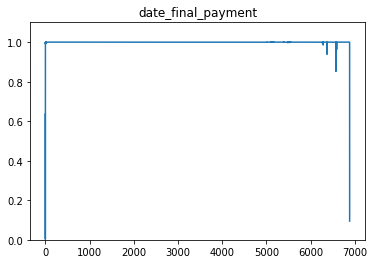

In [5]:
plot_anomalies_max_val_change(data['date_final_payment']);

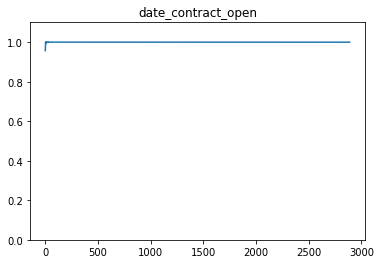

In [6]:
plot_anomalies_max_val_change(data['date_contract_open']);

W przypadku `date_final_payment` mamy skoki wartości zarówno przy niskich danach jak i wysokich, natomiast dla `date_contract_open` jest skok dla małych dat.

In [7]:
sorted(data.date_final_payment.unique())[-5:]

[72958.0, 72959.0, 72960.0, 72961.0, 771529.0]

In [8]:
sorted(data.date_final_payment.unique(), reverse = True)[-5:]

[36951.0, 36926.0, 36799.0, 99.0, 63.0]

Usuwam rekordy `date_final_payment` z rokiem ~1900 i ~4200 (łącznie 3 rekordy)

In [9]:
data=data[((data.date_final_payment > 100) & (data.date_final_payment < 771520)) | (data.date_final_payment.isnull())]

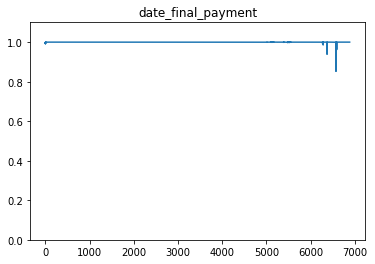

In [10]:
plot_anomalies_max_val_change(data['date_final_payment']);

Pozostają jeszcze anomalie w okolicy roku 2100, ale być może jest to coś na zasadzie 'dożywotnio'

In [11]:
sorted(data.date_contract_open, reverse = True)[-5:]

[36345, 36344, 36343, 35550, 34004]

Usuwam rekordy `date_contract_open` z wartościami 35550 i 34004 (łącznie 2 rekordy)

In [12]:
data=data[(data.date_contract_open > 35550) | (data.date_contract_open.isnull())]

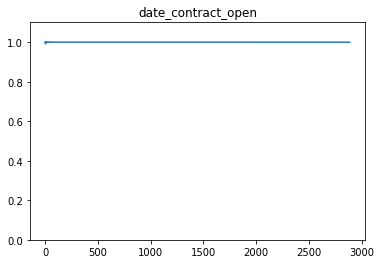

In [13]:
plot_anomalies_max_val_change(data['date_contract_open']);

Zakładam, że `date_closed_account >= date_contract_open`, dlatego niepoprawne obserwacje usuwam (łącznie 17 rekordów)

In [14]:
data.loc[data.date_closed_account < data.date_contract_open, ['date_closed_account', 'date_contract_open']]

,date_closed_account,date_contract_open
15970,38568.0,38859
89380,39294.0,39993
94813,39218.0,40061
100857,39094.0,40128
137224,40074.0,40393
139841,39636.0,40408
143590,40360.0,40429
145696,39868.0,40440
149004,40394.0,40458
151798,40379.0,40473


In [15]:
data = data.loc[(data.date_closed_account >= data.date_contract_open) | data.date_closed_account.isnull()]

In [16]:
data.loc[data.date_closed_account < data.date_contract_open]

,cnt_delay_30d_59d,cnt_delay_5d_29d,cnt_delay_60d_89d,cnt_delay_upto_30d,cnt_delay_upto_5d,cnt_delay_upto_90d,code_b,code_contract_status,code_contract_type,code_currency,...,id_customer,id_index,is_bad,loan_rate,val_balance_curr,val_credit_limit,val_debt_amount_max,val_debt_curr,val_debt_overdue_curr,val_payment_next


## KWOTY

In [17]:
anomalies = pd.DataFrame()
for column in data.filter(regex='^val').columns:
    anomalies = anomalies.append(anomalies_summary(data[column]))
anomalies.sort_values(by='sum_of_p', ascending=False)

,col_name,n,n_nan,p_nan,n_neg,p_neg,n_zero,p_zero,n_inf,p_inf,n_blank,p_blank,n_distinct,col_type,max_val_change,sum_of_p
0,val_debt_overdue_curr,170313,17,0.000,0,0.0,159335,0.936,0,0.0,0,0,6968,float64,0.200,0.936
0,val_payment_next,170313,93309,0.548,0,0.0,42367,0.249,0,0.0,0,0,9745,float64,0.023,0.797
0,val_debt_amount_max,170313,17,0.000,0,0.0,135602,0.796,0,0.0,0,0,25045,float64,0.224,0.796
0,val_balance_curr,170313,108621,0.638,0,0.0,10463,0.061,0,0.0,0,0,35522,float64,0.420,0.699
0,val_debt_curr,170313,32656,0.192,34,0.0,77448,0.455,0,0.0,0,0,43559,float64,0.460,0.647
0,val_credit_limit,170313,0,0.000,0,0.0,3676,0.022,0,0.0,0,0,30041,uint32,0.100,0.022


`val_debt_curr` posiada 34 wartości ujemne, natomiast wszystkie zmienne mają mocne zmiany wartości (najbardziej `val_payment_next`)

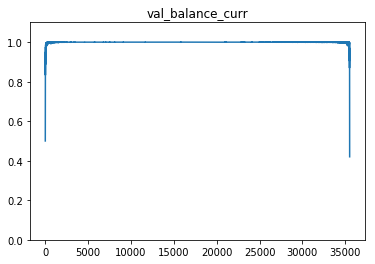

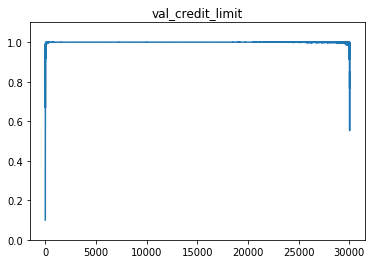

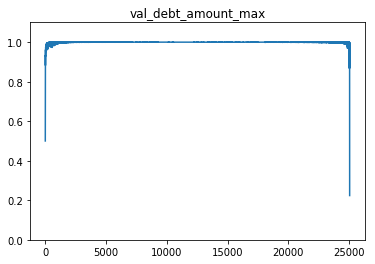

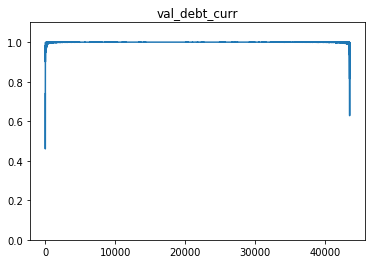

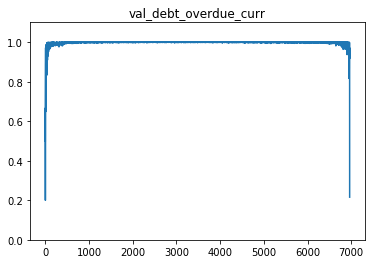

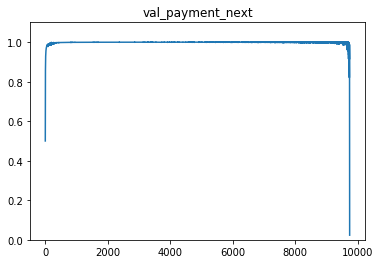

In [18]:
for column in data.filter(regex='^val').columns:
    plot_anomalies_max_val_change(data[column]);

Ujemne `val_debt_curr` zamieniam na 0 (z uwagi na to, że jedna z obserwacji jest ze zbioru testowego)

In [19]:
data.loc[(data.val_debt_curr < 0) & (~data.val_debt_curr.isnull()), 'val_debt_curr'] = 0

Usuwam obserwację z wartością bardzo odstającą dla `val_payment_next` (łącznie 1 rekord)

In [20]:
data=data[(data.val_payment_next < 200000000) | (data.val_payment_next.isnull())]

### Kody

In [21]:
anomalies = pd.DataFrame()
for column in data.filter(regex='^code').columns:
    anomalies = anomalies.append(anomalies_summary(data[column], True))
anomalies.sort_values(by='sum_of_p', ascending=False)

,col_name,n,n_nan,p_nan,n_neg,p_neg,n_zero,p_zero,n_inf,p_inf,n_blank,p_blank,n_distinct,col_type,max_val_change,sum_of_p
0,code_currency,170312,0,0.000,0,0.0,169568,0.996,0,0.0,0,0.0,4,uint8,0.500,0.996
0,code_relationship_contract,170312,0,0.000,0,0.0,169538,0.995,0,0.0,0,0.0,5,uint8,0.500,0.995
0,code_contract_status,170312,0,0.000,0,0.0,75734,0.445,0,0.0,0,0.0,7,uint8,0.404,0.445
0,code_b,170312,0,0.000,0,0.0,67605,0.397,0,0.0,0,0.0,3,uint8,0.500,0.397
0,code_frequency_payments,170312,125,0.001,0,0.0,18973,0.111,0,0.0,0,0.0,11,float64,0.500,0.112
0,code_trustability,170312,5509,0.032,0,0.0,0,0.000,0,0.0,0,0.0,45555,object,NaN,0.032
0,code_contract_type,170312,0,0.000,0,0.0,3219,0.019,0,0.0,0,0.0,11,uint8,0.141,0.019


`code_currency` w 99.6% to jedna kategoria, dlatego wywalam zmienną ze zbioru

In [22]:
data.groupby(['code_currency', 'is_bad']).agg({'code_currency': len})

code_currency
code_currency is_bad               
0             0.0            148073
              1.0             16663
1             0.0               624
              1.0                18
2             0.0                47
3             0.0                 6

In [23]:
del data['code_currency']

`code_relationship_contract` w 99.5% to jedna kategoria, dlatego wywalam zmienną ze zbioru

In [24]:
data.groupby(['code_relationship_contract', 'is_bad']).agg({'code_relationship_contract': len})

code_relationship_contract
code_relationship_contract is_bad                            
1                          0.0                         148054
                           1.0                          16622
2                          0.0                            245
                           1.0                             32
4                          0.0                            308
                           1.0                             20
5                          0.0                             17
                           1.0                              1
9                          0.0                            126
                           1.0                              6

In [25]:
del data['code_relationship_contract']

### Delay

In [26]:
anomalies = pd.DataFrame()
for column in data.filter(regex='^cnt_delay').columns:
    anomalies = anomalies.append(anomalies_summary(data[column]))
anomalies.sort_values(by='sum_of_p', ascending=False)

,col_name,n,n_nan,p_nan,n_neg,p_neg,n_zero,p_zero,n_inf,p_inf,n_blank,p_blank,n_distinct,col_type,max_val_change,sum_of_p
0,cnt_delay_60d_89d,170312,0,0.0,0,0.0,159424,0.936,0,0.0,0,0,22,uint8,0.5,0.936
0,cnt_delay_upto_5d,170312,0,0.0,0,0.0,157479,0.925,0,0.0,0,0,25,uint8,0.5,0.925
0,cnt_delay_upto_90d,170312,0,0.0,0,0.0,156452,0.919,0,0.0,0,0,78,uint8,0.5,0.919
0,cnt_delay_30d_59d,170312,0,0.0,0,0.0,150603,0.884,0,0.0,0,0,27,uint8,0.5,0.884
0,cnt_delay_5d_29d,170312,0,0.0,0,0.0,132899,0.780,0,0.0,0,0,38,uint8,0.5,0.780
0,cnt_delay_upto_30d,170312,0,0.0,0,0.0,127602,0.749,0,0.0,0,0,44,uint8,0.5,0.749


Zmienne zawierają w dużej mierze wartości zerowe, przy większych wartościach są już zmiany nawet o 20%, ale brak jest jednoznacznych wartości odstających.

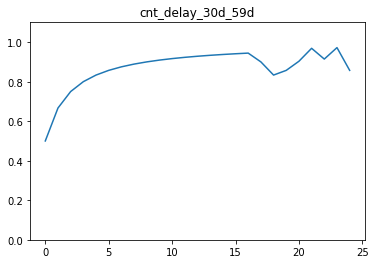

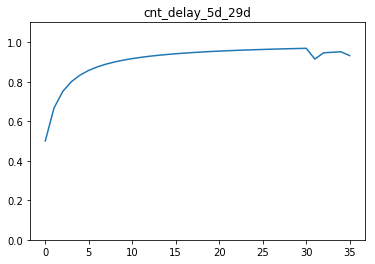

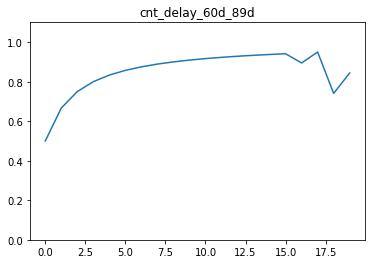

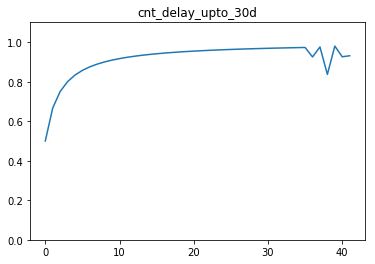

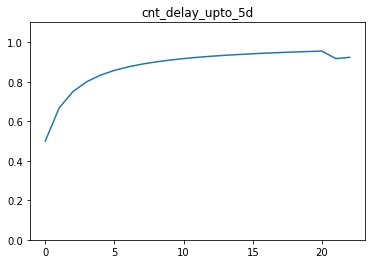

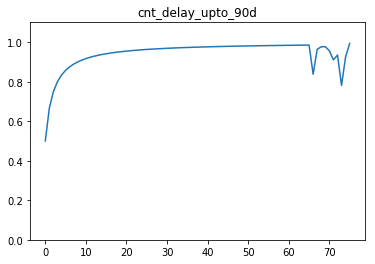

In [27]:
for column in data.filter(regex='^cnt_delay').columns:
    plot_anomalies_max_val_change(data[column]);

### Pozostałe zmienne

In [28]:
others_feats = ['is_bad', 'id_customer', 'id_index', 'loan_rate', 'duration_debt_days']

In [29]:
anomalies = pd.DataFrame()
for column in others_feats:
    anomalies = anomalies.append(anomalies_summary(data[column]))
anomalies.sort_values(by='sum_of_p', ascending=False)

,col_name,n,n_nan,p_nan,n_neg,p_neg,n_zero,p_zero,n_inf,p_inf,n_blank,p_blank,n_distinct,col_type,max_val_change,sum_of_p
0,duration_debt_days,170312,32164,0.189,0,0.0,128159,0.752,0,0.0,0,0,1275,float64,0.500,0.941
0,loan_rate,170312,0,0.000,0,0.0,155878,0.915,0,0.0,0,0,60,uint16,0.459,0.915
0,is_bad,170312,4881,0.029,0,0.0,148750,0.873,0,0.0,0,0,3,float64,NaN,0.902
0,id_customer,170312,0,0.000,0,0.0,6,0.000,0,0.0,0,0,34881,uint16,0.500,0.000
0,id_index,170312,0,0.000,0,0.0,0,0.000,0,0.0,0,0,170312,uint32,0.667,0.000


is_bad(float64): nie można narysować wykresu dla tego typu.


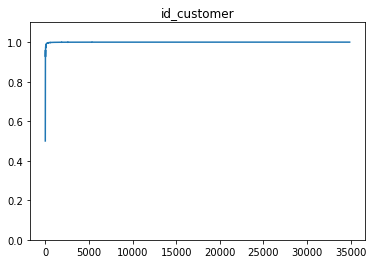

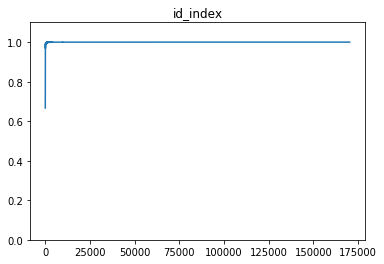

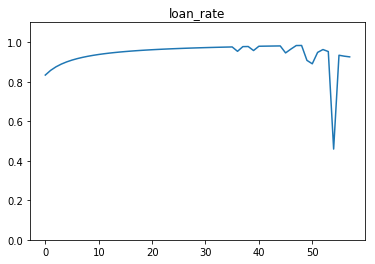

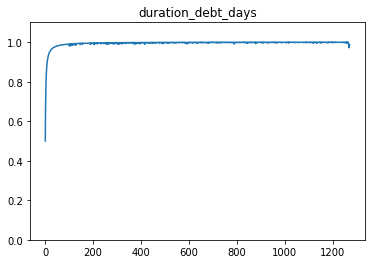

In [30]:
for column in others_feats:
    plot_anomalies_max_val_change(data[column]);

Usuwam `loan_rate` większy lub równy 100%

In [31]:
data = data.loc[data.loan_rate < 100]

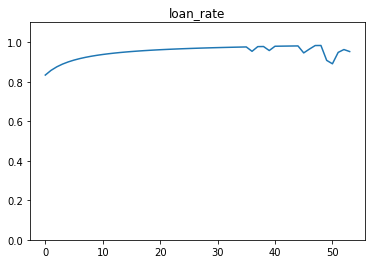

In [32]:
plot_anomalies_max_val_change(data.loan_rate);

### Zapis

In [33]:
data.to_hdf('../data/data.base_wo.h5', 'base_wo', format='table')

In [34]:
print("Zapisano dane do pliku ../data/data.base_wo.h5")

Zapisano dane do pliku ../data/data.base_wo.h5
